# Coursera Capstone Project

### IBM Applied Data Science Capstone

In [122]:
pip -q install folium

Note: you may need to restart the kernel to use updated packages.


In [123]:
pip -q install wget

Note: you may need to restart the kernel to use updated packages.


In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
print('Hello Capstone Project Course!')
import folium
import wget
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import matplotlib.pyplot as plt

Hello Capstone Project Course!


Download the states geojson file for the coropleth map

In [125]:
wget.download('https://github.com/python-visualization/folium/raw/master/examples/data/us-states.json')

100% [..............................................................................] 87688 / 87688

'us-states (4).json'

In [126]:
CLIENT_ID =  'xxx' # your Foursquare ID
CLIENT_SECRET =  'xxx' # your Foursquare Secret
VERSION = 'xxx' # Foursquare API version

In [128]:
#Download obesity data from CDC

df_obesity=pd.read_csv("https://chronicdata.cdc.gov/api/views/fqb7-mgjf/rows.csv?accessType=DOWNLOAD")
df_obesity.head(1)

,Year,Locationabbr,Locationdesc,Class,Topic,Question,Response,Break_Out,Break_Out_Category,Sample_Size,...,Data_Value_Footnote,DataSource,ClassId,TopicId,LocationID,BreakoutID,BreakOutCategoryID,QuestionID,ResponseID,GeoLocation
0,2018,AK,Alaska,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Underweight (BMI 12.0-18.4),College graduate,Education Attained,10,...,Prevalence estimate not available if the unwei...,BRFSS,CLASS14,TOPIC09,2,EDUCA4,CAT5,_BMI5CAT,RESP042,"(64.84507995700051, -147.72205903599973)"


In [129]:
df_obesity.columns

Index(['Year', 'Locationabbr', 'Locationdesc', 'Class', 'Topic', 'Question',
       'Response', 'Break_Out', 'Break_Out_Category', 'Sample_Size',
       'Data_value', 'Confidence_limit_Low', 'Confidence_limit_High',
       'Display_order', 'Data_value_unit', 'Data_value_type',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'DataSource',
       'ClassId', 'TopicId', 'LocationID', 'BreakoutID', 'BreakOutCategoryID',
       'QuestionID', 'ResponseID', 'GeoLocation'],
      dtype='object')

In [130]:
#select only the 2018 data showiing the overall numbers for Obese patients

df_obesity=df_obesity.loc[(df_obesity['Year']==2018) & (df_obesity['Break_Out']=='Overall') & (df_obesity['Response']=='Obese (BMI 30.0 - 99.8)')]
df_obesity.rename(columns={'Locationabbr':'LocationAbbr', 'Data_value':'Data_Value', 'Locationdesc':'LocationDesc'}, inplace=True)
df_obesity=df_obesity.drop(['Confidence_limit_Low', 'Confidence_limit_High', 'Display_order', 'Data_value_unit', 'Data_value_type','Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'GeoLocation'], axis=1)
df_obesity=df_obesity.sort_values('Data_Value', ascending=False)
df_obesity.head(1)

,Year,LocationAbbr,LocationDesc,Class,Topic,Question,Response,Break_Out,Break_Out_Category,Sample_Size,Data_Value,DataSource,ClassId,TopicId,LocationID,BreakoutID,BreakOutCategoryID,QuestionID,ResponseID
5327,2018,WV,West Virginia,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),Overall,Overall,1797,39.53,BRFSS,CLASS14,TOPIC09,54,BO1,CAT1,_BMI5CAT,RESP039


In [131]:
us_geo = r'us-states.json' # geojson file

# create a map
us_map=folium.Map(location=[38.34774030000045, -98.20078122699965], zoom_start=4)

In [132]:
#Let's generate a state map with the obesity prevalence

us_map.choropleth(
    geo_data=us_geo,
    data=df_obesity,
    columns=['LocationAbbr', 'Data_Value'],
    nan_fill_color='purple',
    key_on='feature.id',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Obesity',
    
)

# display map
us_map

In [133]:
#Download risk factors data from CDC
df_risk_factors=pd.read_csv("https://chronicdata.cdc.gov/api/views/k8w5-7ju6/rows.csv?accessType=DOWNLOAD")
df_risk_factors.head(1)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2014,2014,TX,Texas,Breastfeeding Surveillance Sources,Breastfeeding,Breastfeeding - Environmental or Policy Supports,"Number of La Leche League leaders per 1,000 li...",NaN,Value,...,"(31.827240407, -99.426770206)",BF,BF2,Q014,VALUE,48,Total,Total,OVR,OVERALL


We will get only the data for 2018 that relates to the proximity to oooprtunities for physical activity

In [134]:
df_phys_act_opp=df_risk_factors.loc[(df_risk_factors['Question']=="Percent of U.S. population living within 1/2 mile of a park")]
df_phys_act_opp.head(1)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
613,2015,2015,MN,Minnesota,National Environmental Public Health Tracking ...,Physical Activity,Physical Activity - Environmental or Policy Su...,Percent of U.S. population living within 1/2 m...,NaN,Value,...,"(46.355648736, -94.794200503)",PA,PA2,Q050,VALUE,27,Total,Total,OVR,OVERALL


Removing unnecessary columns, removing the row that has the National data and the row(s) that have NaN  for the value we need to analyze

In [135]:
df_phys_act_opp=df_phys_act_opp.drop(['YearEnd',  'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
        'Data_Value_Alt','Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 
        'DataValueTypeID',  'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'], axis=1)
df_phys_act_opp=df_phys_act_opp[df_phys_act_opp["LocationDesc"]!='National']
df_phys_act_opp.dropna(subset=["Data_Value"], axis=0, inplace=True)
df_phys_act_opp.sort_values('Data_Value', ascending=False, inplace=True)
df_phys_act_opp.head(1)

,YearStart,LocationAbbr,LocationDesc,Data_Value,Total,GeoLocation,ClassID,TopicID,QuestionID,LocationID
974,2015,DC,District of Columbia,95.7,Total,"(38.890371385, -77.031961127)",PA,PA2,Q050,11


Sorting the values

In [136]:
# converting the access to proximity to a park to its inverse value
df_lack_of_phys_act_opp=df_phys_act_opp.copy()
df_lack_of_phys_act_opp["Data_Value"]=100-df_lack_of_phys_act_opp["Data_Value"].astype('float')
df_lack_of_phys_act_opp=df_lack_of_phys_act_opp.sort_values('Data_Value', ascending=False)
df_lack_of_phys_act_opp.head()

,YearStart,LocationAbbr,LocationDesc,Data_Value,Total,GeoLocation,ClassID,TopicID,QuestionID,LocationID
739,2015,WV,West Virginia,85.6,Total,"(38.665510202, -80.712640135)",PA,PA2,Q050,54
816,2015,SC,South Carolina,83.1,Total,"(33.998821303, -81.045371207)",PA,PA2,Q050,45
970,2015,NH,New Hampshire,82.8,Total,"(43.655950113, -71.50036092)",PA,PA2,Q050,33
1272,2015,ME,Maine,82.6,Total,"(45.254228894001, -68.985031336)",PA,PA2,Q050,23
948,2015,AR,Arkansas,77.9,Total,"(34.748650124, -92.274490743)",PA,PA2,Q050,5


Create a choropleth map

In [137]:

# create a map
us_map_phys=folium.Map(location=[38.34774030000045, -98.20078122699965], zoom_start=4)

In [138]:
#Let's generate a map with the prevalence of people who say they don't have access to a park within 1/2 mile radius

us_map_phys.choropleth(
    geo_data=us_geo,
    data=df_lack_of_phys_act_opp,
    columns=['LocationAbbr', 'Data_Value'],
    nan_fill_color='purple',
    key_on='feature.id',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Lack of nearby parks',
    
)

# display map
us_map_phys

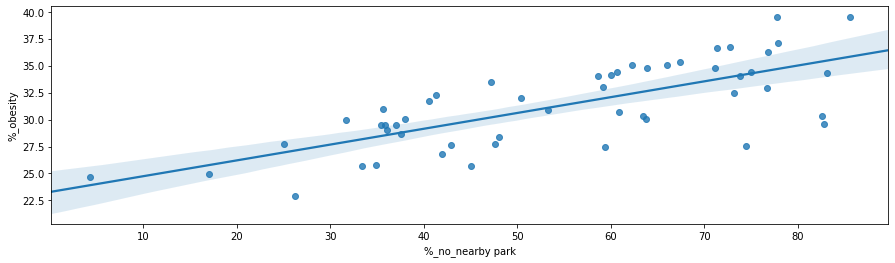

In [139]:
#create a dataframe to plot to llo at obesity versus access to parks
plt.figure(figsize=(15,4))
df_for_plot=df_obesity.merge(df_lack_of_phys_act_opp, on="LocationAbbr", suffixes=('_obesity', '_no_nearby park'))
df_for_plot.rename(columns={'Data_Value_obesity':'%_obesity', 'Data_Value_no_nearby park':'%_no_nearby park'}, inplace=True)
sns.regplot(data=df_for_plot, x='%_no_nearby park', y='%_obesity')

Create a list of the top  and bottom  states in terms of proximity to activity

In [140]:
df_phys_act_opp_tb=df_phys_act_opp.iloc[[0,1,2,-1,-2,-3]]
df_phys_act_opp_tb

,YearStart,LocationAbbr,LocationDesc,Data_Value,Total,GeoLocation,ClassID,TopicID,QuestionID,LocationID
974,2015,DC,District of Columbia,95.7,Total,"(38.890371385, -77.031961127)",PA,PA2,Q050,11
979,2015,HI,Hawaii,82.9,Total,"(21.304850435, -157.857749403)",PA,PA2,Q050,15
833,2015,UT,Utah,74.9,Total,"(39.360700171, -111.587130635)",PA,PA2,Q050,49
739,2015,WV,West Virginia,14.4,Total,"(38.665510202, -80.712640135)",PA,PA2,Q050,54
816,2015,SC,South Carolina,16.9,Total,"(33.998821303, -81.045371207)",PA,PA2,Q050,45
970,2015,NH,New Hampshire,17.2,Total,"(43.655950113, -71.50036092)",PA,PA2,Q050,33


In [141]:
df_obesity_tb=df_obesity.iloc[[0,1,2,-1,-2,-3]]
df_obesity_tb

,Year,LocationAbbr,LocationDesc,Class,Topic,Question,Response,Break_Out,Break_Out_Category,Sample_Size,Data_Value,DataSource,ClassId,TopicId,LocationID,BreakoutID,BreakOutCategoryID,QuestionID,ResponseID
5327,2018,WV,West Virginia,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),Overall,Overall,1797,39.53,BRFSS,CLASS14,TOPIC09,54,BO1,CAT1,_BMI5CAT,RESP039
2715,2018,MS,Mississippi,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),Overall,Overall,2225,39.47,BRFSS,CLASS14,TOPIC09,28,BO1,CAT1,_BMI5CAT,RESP039
252,2018,AR,Arkansas,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),Overall,Overall,1733,37.12,BRFSS,CLASS14,TOPIC09,5,BO1,CAT1,_BMI5CAT,RESP039
544,2018,CO,Colorado,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),Overall,Overall,1887,22.95,BRFSS,CLASS14,TOPIC09,8,BO1,CAT1,_BMI5CAT,RESP039
822,2018,DC,District of Columbia,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),Overall,Overall,1022,24.69,BRFSS,CLASS14,TOPIC09,11,BO1,CAT1,_BMI5CAT,RESP039
1282,2018,HI,Hawaii,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),Overall,Overall,1851,24.92,BRFSS,CLASS14,TOPIC09,15,BO1,CAT1,_BMI5CAT,RESP039


Some of the 3 states that appear at the ends of the list of obesity by states are very different, in terms of size and population. I need a list of states  similar in population, so I will be using data from https://worldpopulationreview.com/states/ which I downloaded as us_state_pop.csv

In [142]:
df_pop=pd.read_csv("us_state_pop.csv")
df_pop.head()

,rank,State,Pop,Growth,Pop2018,Pop2010,growthSince2010,Percent,density
0,1,California,39937489,0.0096,39557045,37320903,0.0701,0.1194,256.3727
1,2,Texas,29472295,0.0268,28701845,25242679,0.1676,0.0881,112.8204
2,3,Florida,21992985,0.0326,21299325,18845785,0.1670,0.0658,410.1256
3,4,New York,19440469,-0.0052,19542209,19400080,0.0021,0.0581,412.5211
4,5,Pennsylvania,12820878,0.0011,12807060,12711158,0.0086,0.0383,286.5449


Let's see what the population stats look like:

In [143]:
df_pop['Pop'].describe()

count    5.200000e+01
mean     6.429830e+06
std      7.392876e+06
min      5.670250e+05
25%      1.814134e+06
50%      4.400390e+06
75%      7.483144e+06
max      3.993749e+07
Name: Pop, dtype: float64

The 25th percentile is about 1.8 Million and the 75th percentile is about 7.5 Million. We will try to get the obesity for the states that fall in this group

In [144]:
df_pop25_75=df_pop[df_pop['Pop']>df_pop['Pop'].describe().iloc[4]]
df_pop25_75=df_pop25_75[df_pop['Pop']<df_pop['Pop'].describe().iloc[6]]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [145]:
df_pop25_75['State'].head()

13          Arizona
14    Massachusetts
15        Tennessee
16          Indiana
17         Missouri
Name: State, dtype: object

Let's get the top and bottom states for obesity rates from the list of states that have a population between 25-75 percentile

In [146]:
df_phys_act_opp_tb=df_phys_act_opp[df_phys_act_opp['LocationDesc'].isin(df_pop25_75['State'])].iloc[[0,1,2,3,4, -1, -2, -3, -4, -5]]
df_phys_act_opp_tb.to_csv('df_phys_act_opp_tb.csv')

In [147]:
df_obesity_tb=df_obesity[df_obesity['LocationDesc'].isin(df_pop25_75['State'])].iloc[[0,1,2,3,4, -1, -2, -3, -4, -5]]
df_obesity_tb.to_csv('df_obesity_tb.csv')

In [148]:
#This function will get all venues (subject to foursquare limits) in a list of locatsions, such as zip codes and states 

def getVenuesByState(locations):
    venues_list=[]
    for location in locations:
       

            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&near={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            location)
            
           
        # make the GET request

        raw_results = requests.get(url).json()
        #print(raw_results)
        print(".", end="")
        if raw_results['meta']['code']==200:
            results=raw_results["response"]['groups'][0]['items']


            # return only relevant information for each nearby venue
            venues_list.append([(
                location, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])

    nearby_venues.columns = ['Location', 
                  'Name', 
                  'Longitude', 
                  'Latitude',                    
                  'Venue Category']
  
    return(nearby_venues)

In [149]:
#We will be running the data for the states we select here, then we will be copying and isnerting the graphs into the report
State='Alabama'
ST='AL'
county_data_file=f'2020 County Health Rankings {State} Data - v1_1.xlsx'

In [150]:
#Data was downloaded separately from Robert Wood Johnson FOundation Program, for example  https://www.countyhealthrankings.org/app/utah/2020/downloads 

df_county_data=pd.read_excel(county_data_file, sheet_name='Ranked Measure Data', header=1)[['State', 'County', '% Adults with Obesity']]
df_county_population=pd.read_excel(county_data_file, sheet_name='Additional Measure Data', header=1)[['State', 'County', 'Population']]
df_county_data.dropna(subset=["County"], axis=0, inplace=True)
df_county_population.dropna(subset=["County"], axis=0, inplace=True)
#merge the data obtained from the worksdheets
df_county_data=df_county_data.join(df_county_population, lsuffix="", rsuffix="_pop")
#Drop the similar columns
df_county_data=df_county_data.drop(['State_pop', 'County_pop'], axis=1)

df_county_data['Population'].describe()

count        67.000000
mean      72953.298507
std      106916.180941
min        8233.000000
25%       17824.000000
50%       33615.000000
75%       82664.500000
max      659300.000000
Name: Population, dtype: float64

In [151]:
# selecting only the counties that are in the middle quartiles and sorting in 
df_county_pop25_75=df_county_data[df_county_data['Population']>df_county_data['Population'].describe().iloc[4]]
df_county_pop25_75=df_county_pop25_75[df_county_pop25_75['Population']<df_county_data['Population'].describe().iloc[6]]


In [152]:
#let's get the top and bottom counties in terms of access and add a column to qualify the county as top or bottom in the list
df_state_tb=df_county_pop25_75.sort_values(['% Adults with Obesity']).iloc[[0,1,2,3,4, -1, -2, -3, -4, -5]]
df_state_tb['% Obesity']=['b','b','b','b','b','t', 't', 't','t', 't']

df_states_zips=pd.read_csv('zip_county_fips_2018_03.csv')
#limit the seqarch to state and search for the zipcodes of the top and bottom counties in terms of access to exercise

df_state_tb['state']=ST
df_state_tb['County']=df_state_tb['County']+' County'
df_state_tb.rename(columns={'County':'countyname'}, inplace=True)


df_state_zips=df_states_zips[df_states_zips['state']==ST]
#df_state_zips=df_state_zips[df_state_zips['countyname'].isin(df_state_tb['County']+' County')]
df_state_zips=df_state_zips.merge(df_state_tb, on=['countyname','state'])

#build a column named "locations" to hold the zip code, State for the venues search
df_state_zips['locations']=df_state_zips['state']+', '+df_state_zips['zip'].astype(str)

#Let's verify the function for a location in NY City. We will use the state and zipcode as location.

#We need the list of zipcodes for each county in the states that we want to investigate. I found the dataset here https://data.world/niccolley/us-zipcode-to-county-state and saved it to the working directory

#let's now assemble two lists of locations with   state and zip for areas with high and low access

locations_state_t=df_state_zips[df_state_zips['% Obesity']=='t']['locations']
locations_state_b=df_state_zips[df_state_zips['% Obesity']=='b']['locations']

venuesLists_t=[]
venuesByState=getVenuesByState(list(locations_state_t))
venuesLists_t.append(venuesByState)

venuesLists_b=[]
venuesByState=getVenuesByState(list(locations_state_b))
venuesLists_b.append(venuesByState)



vstatet=pd.DataFrame(venuesLists_t[0]['Venue Category'].value_counts(normalize=True, sort=True, ascending=False, bins=None, dropna=True).head(20))
vstatet=vstatet.reset_index()


vstateb=venuesLists_b[0]['Venue Category'].value_counts(normalize=True, sort=True, ascending=False, bins=None, dropna=True).head(20)
vstateb=vstateb.reset_index()

venues_state_tb=vstatet.merge(vstateb, on='index', how='outer')
venues_state_tb=venues_state_tb.rename(columns={'index':'Category','Venue Category_x':'High Obesity problem', 'Venue Category_y':'Low Obesity problem'})

..........................................................................................................................................

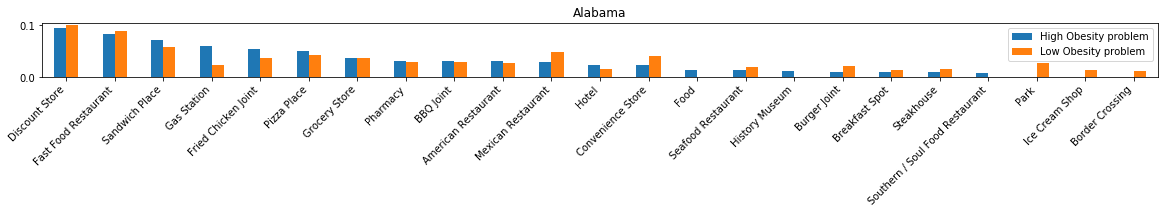

In [153]:
ax=venues_state_tb.plot(kind='bar', figsize=(20,1))

ax.set_xticklabels(venues_state_tb['Category'], rotation = 45, ha="right")
ax.set_title(State)
plt.show()